In [34]:
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath("..")) 

from src.preprocessing import Preprocessor
from src.models import LogisticModel, KNNModel, SVMModel, RFModel, get_default_models
from src.models import get_default_models
from src.evaluator import Evaluator

In [35]:
prep1 = Preprocessor("/Users/wendy/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 2/MATE50001/Computing/Coursework/dataset_1 (1).csv")
X_train1, X_test1, y_train1, y_test1 = prep1.preprocess()

df1 = prep1.df.copy()   # after dropna()
feature_cols = [c for c in df1.columns if c != "label"]
print(feature_cols)

['density', 'vacancy_content', 'melting_temperature', 'heat_conductivity', 'band_gap', 'crystallinity_index', 'thermal_expansion_coeff', 'young_modulus', 'hardness', 'lattice_parameter']


In [36]:
models = get_default_models()
ev = Evaluator(class_names=["non-conductive", "conductive"])

from sklearn.metrics import accuracy_score

for name, model in models.items():
    model.fit(X_train1, y_train1)
    y_pred = model.predict(X_test1)
    acc = accuracy_score(y_test1, y_pred)
    print(name, "test accuracy:", acc)

logistic test accuracy: 1.0
knn test accuracy: 0.9579646017699115
svm_rbf test accuracy: 1.0
random_forest test accuracy: 1.0


=== logistic ===
{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}


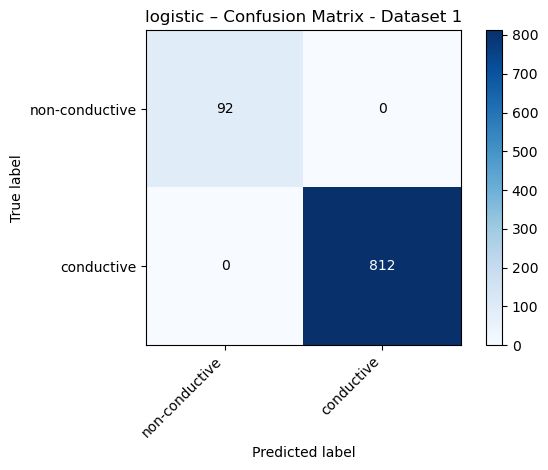

=== knn ===
{'accuracy': 0.9579646017699115, 'precision': 0.9655172413793104, 'recall': 0.6086956521739131, 'f1': 0.7466666666666667}


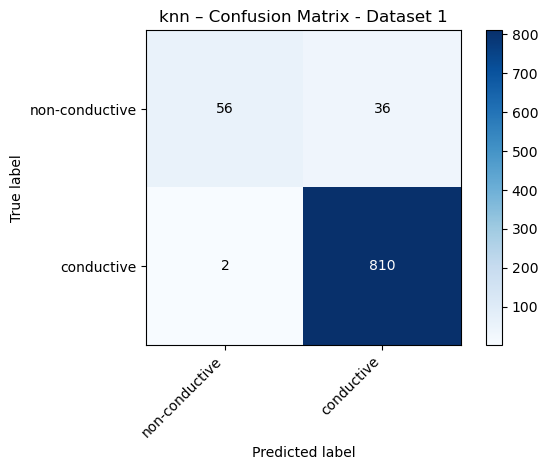

=== svm_rbf ===
{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}


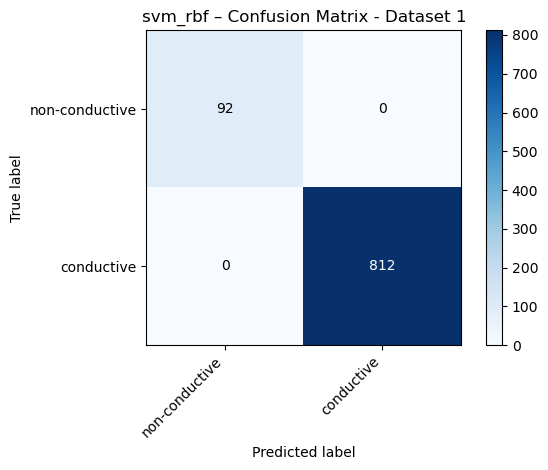

=== random_forest ===
{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}


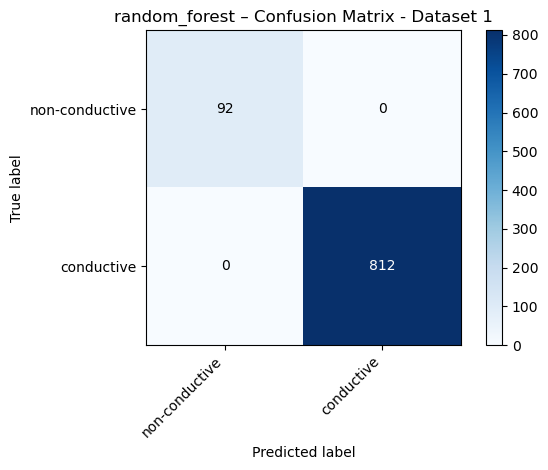

,accuracy,precision,recall,f1
logistic,1.000000,1.000000,1.000000,1.000000
knn,0.957965,0.965517,0.608696,0.746667
svm_rbf,1.000000,1.000000,1.000000,1.000000
random_forest,1.000000,1.000000,1.000000,1.000000


In [37]:
os.makedirs("plots", exist_ok=True)
os.makedirs("metrics", exist_ok=True)

ev = Evaluator(class_names=["non-conductive", "conductive"])

models = get_default_models()
results = {}

baseline_results = {}

for name, model in models.items():
    model.fit(X_train1, y_train1)
    y_pred = model.predict(X_test1)

    metrics = ev.compute_metrics(
        y_test1,
        y_pred,
        average="binary",
        pos_label="conductive"
    )
    baseline_results[name] = metrics

    print(f"=== {name} ===")
    print(metrics)

    ev.plot_confusion_matrix(
        y_test1,
        y_pred,
        title=f"{name} – Confusion Matrix - Dataset 1",
        save_path=f"plots/dataset1_confusion_{name}.png",
        save_metrics_path=f"metrics/dataset1_confusion_{name}.csv",
    )
pd.DataFrame(baseline_results).T

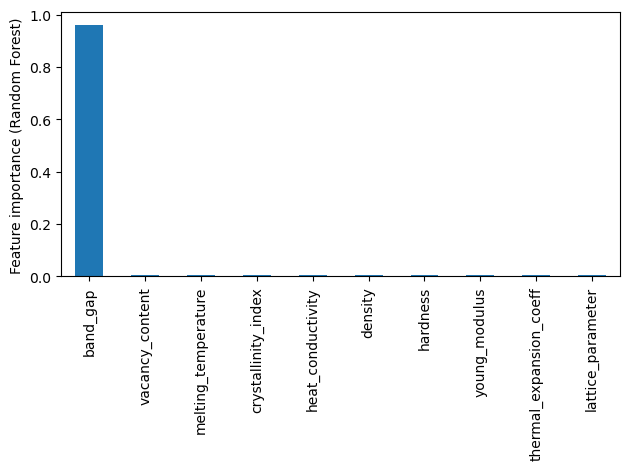

In [41]:
rf = RFModel()
rf.fit(X_train1, y_train1)

importances = rf.model.feature_importances_   # underlying RandomForestClassifier
feat_imp = pd.Series(importances, index=feature_cols).sort_values(ascending=False)
feat_imp.plot(kind="bar")
plt.ylabel("Feature importance (Random Forest)")
plt.tight_layout()
plt.show()

In [42]:
ranked_features = list(feat_imp.index)
ranked_features

['band_gap',
 'vacancy_content',
 'melting_temperature',
 'crystallinity_index',
 'heat_conductivity',
 'density',
 'hardness',
 'young_modulus',
 'thermal_expansion_coeff',
 'lattice_parameter']